<a href="https://colab.research.google.com/github/sherlock-beep/tf_learn/blob/main/tf_learn8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

使用tensorflow训练CNN对CIFAR10图集进行分类
CIFAR10数据集有60000张彩色图片，数据集包含10类

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


In [4]:
#下载数据集
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#对数据图片进行归一化
train_images, test_images = train_images / 255.0, test_images / 255.0

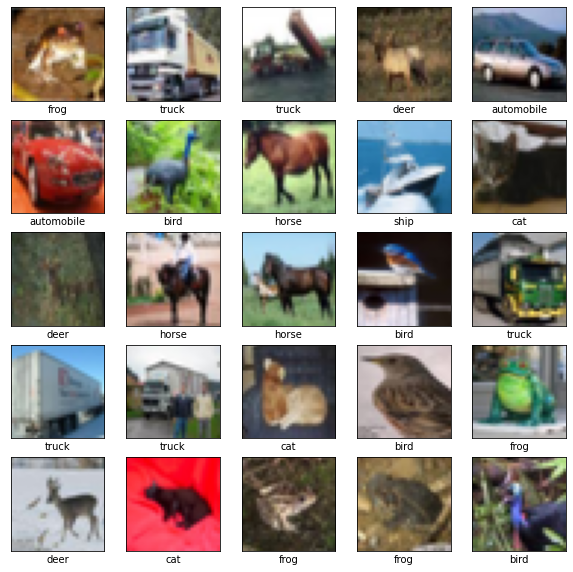

In [5]:
#对数据集中的数据进行验证
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
#构建模型
#Conv2D(32*3*3) -> MaxPool2D(2,2)->Conv2D(64*3*3) 
# -> MaxPool2D(2,2)-> Conv2D(64*3*3) ->Flattn -> Dense(64) ->Dense(10)
model = models.Sequential(
    [layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.Flatten(),
     layers.Dense(64,activation='relu'),
     layers.Dense(10)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
#编译模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])

Epoch 1/20
1563/1563 [==============================] - 10s 5ms/step - loss: 1.4993 - accuracy: 0.4522 - val_loss: 1.2272 - val_accuracy: 0.5604
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1333 - accuracy: 0.6002 - val_loss: 1.0247 - val_accuracy: 0.6390
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9748 - accuracy: 0.6573 - val_loss: 0.9426 - val_accuracy: 0.6732
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8735 - accuracy: 0.6927 - val_loss: 0.9364 - val_accuracy: 0.6718
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8061 - accuracy: 0.7203 - val_loss: 0.8824 - val_accuracy: 0.6942
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7526 - accuracy: 0.7368 - val_loss: 0.8696 - val_accuracy: 0.7037
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6976 - accuracy: 0.7573 - val_loss: 0.8644 - val_accuracy

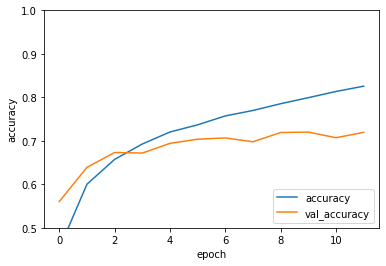

313/313 - 1s - loss: 0.9151 - accuracy: 0.7195 - 761ms/epoch - 2ms/step
0.7195000052452087


In [8]:
#评估模型
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, 
                                     verbose=2)
print(test_acc)
#待提升，模型过拟合，考虑采用drop层或正则化提高模型的泛化能力

下面使用tensorflow对存储在磁盘的花卉数据集进行分类

In [11]:
#导入相关库
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import tensorflow as tf
import pathlib

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [18]:
#查看数据集文件分布
!ls /root/.keras/datasets/flower_photos


daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [13]:
#查看图片数据集中花卉图片数量
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


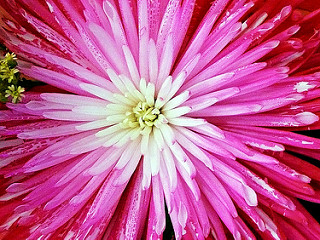

In [20]:
#查看roses文件下的第一张玫瑰花图片
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

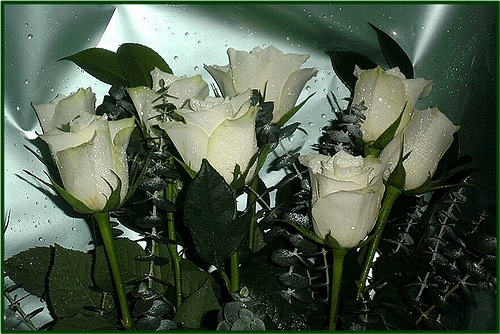

In [21]:
PIL.Image.open(str(roses[1]))